In [1]:
import pandas as pd
from sklearn.metrics import roc_curve, roc_auc_score

In [12]:
df = pd.read_csv("data_petra/papers_test_novelty_scores.csv", index_col=0)
df["CONST"] = 1.0

In [22]:
len(df)

1960

In [23]:
(df["NEW_FINDING"] > 0).sum()

1058

In [13]:
df.columns

Index(['SCOPUS ID', 'PUBMED ID', 'title', 'journal', 'volume', 'articlenum',
       'date', 'type', 'forward citations', 'abstract', 'keywords', 'authors',
       'backward citations', 'id', 'CONTROVERSIAL', 'GOOD_FOR_TEACHING',
       'CONFIRMATION', 'TECHNICAL_ADVANCE', 'NOVEL_DRUG_TARGET', 'NEW_FINDING',
       'HYPOTHESIS', 'REFUTATION', 'NEGATIVE', 'year', 'llm_novelty', 'XGBR',
       'XGBC', 'XGBC+', 'XGBR+', 'BERT LOF', 'BERT IF', 'BERT XGBC',
       'BERT_a LOF', 'BERT_a IF', 'BERT_a XGBC', 'ELMO LOF', 'ELMO IF',
       'ELMO XGBC', 'ELMO_a LOF', 'ELMO_a IF', 'ELMO_a XGBC', 'ELMO NN',
       'ELMO_a NN', 'CONST'],
      dtype='object')

In [14]:
def create_roc_curve(df, method):

    y = (df["NEW_FINDING"] > 0).astype(int)
    y_score = df[method]
        
    fpr, tpr, ths = roc_curve(y, y_score)
    res = pd.DataFrame()
    res["FPR"] = fpr
    res["TPR"] = tpr 
    res["thresholds"] = ths
    res["method"] = method
        
    return res, roc_auc_score(y, y_score)

In [15]:
results = []
scores = []
#for method in ("XGBR", "XGBC", "fastText + allIF", "fastText + allLOF", "fastText + XGBC",
##               "BERT + LOF", "BERT + IF", "BERT + XGBC",
#               "ELMO + LOF", "ELMO + IF", "ELMO + XGBC"):
for method in ("XGBR", "XGBC", "XGBR+", "XGBC+", 
               "BERT XGBC",  "BERT LOF", "BERT IF",
               "BERT_a XGBC",  "BERT_a LOF", "BERT_a IF",
               "ELMO XGBC",    "ELMO LOF", "ELMO IF",
               "ELMO_a XGBC",  "ELMO_a LOF", "ELMO_a IF",
              "ELMO_a NN", "ELMO NN",
              "CONST"):
    curve, score = create_roc_curve(df, method)
    results.append(curve)
    scores.append({"method": method, "auc": score})

In [16]:
df2 = pd.read_csv("data_petra/papers_test_llm.csv", index_col=0)

In [17]:
#df2 = df2[df2["llm_novelty"].isna() == False]
df2["llm_novelty"] = 0.1 * df2["llm_novelty"]
df2.columns

Index(['Unnamed: 0.1', 'SCOPUS ID', 'PUBMED ID', 'title', 'journal', 'volume',
       'articlenum', 'date', 'type', 'forward citations', 'abstract',
       'keywords', 'authors', 'backward citations', 'id', 'CONTROVERSIAL',
       'GOOD_FOR_TEACHING', 'CONFIRMATION', 'TECHNICAL_ADVANCE',
       'NOVEL_DRUG_TARGET', 'NEW_FINDING', 'HYPOTHESIS', 'REFUTATION',
       'NEGATIVE', 'year', 'llm_novelty'],
      dtype='object')

In [18]:
curve, score = create_roc_curve(df2, "llm_novelty")
results.append(curve)
scores.append({"method": "llm_novelty", "auc": score})

In [19]:
results_df = pd.concat(results)

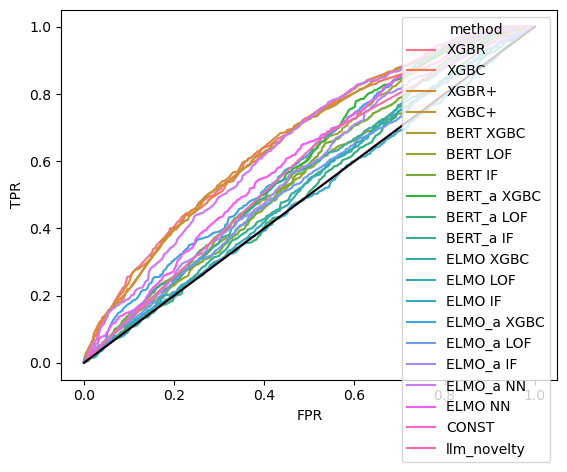

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt 

ax = sns.lineplot(data=results_df, x="FPR", y="TPR", hue="method")
plt.plot([0,1], [0,1], color="black")

In [21]:
pd.DataFrame(scores).sort_values("auc")

,method,auc
12,ELMO IF,0.499847
18,CONST,0.500000
8,BERT_a LOF,0.520307
11,ELMO LOF,0.522530
9,BERT_a IF,0.538105
14,ELMO_a LOF,0.539546
5,BERT LOF,0.546489
10,ELMO XGBC,0.553375
6,BERT IF,0.564864
15,ELMO_a IF,0.570608
